In [89]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

import pandas as pd
from sklearn.metrics import mean_absolute_error

# zf = zipfile.ZipFile('train.csv') # having First.csv zipped file.
# df = pd.read_csv(zf.open('First.csv'))
# zf.namelist()

In [90]:
df = pd.read_csv('trials.csv')
df.head()

,seg_id,s_1.4,s_1.671,s_1.666,no_mad_no_scale,s_3.9,no_mad,all_features,no_median_mad,no_min_max_median_mad_mean,all_features_no_scale,no_skew_q95_q05_ns,no_mad_skew_q95_q05_ns,1.9_no_mad_ns_80kiter,no_mad_ns_150kiter,X_boost_wImean,cat_boost_wImean,x_boost,x_boost_all_features,x_boost_rollingmean,cat_rollingmeans,1.6_altered,1.6_altered_alldata,"no_Rstd,Rmean,min,max","no_mad,Rstd,Rmean,min,max",q1_q.01_q.05,"x_boost_q.01,q1","x_boost_q.01,q2_chunk100k","cat_boost_q.01,q2_chunk100k",cat_boost_X^2_iter150k,cat_boost_stress,"cat_boost_gmean,moment","cat_boost_cov,mad,^2","XG_boost_cov,mad,^2"
0,seg_00030f,3.163450,6.438513,6.487710,6.011056,7.245735,3.824400,7.130780,3.622011,4.060029,6.432572,6.993139,6.759790,4.108137,6.600548,5.312391,0.425954,5.620707,5.161834,7.617999,6.683414,4.416235,4.844968,6.166809,6.648070,5.364513,6.171664,6.630610,6.372284,6.021126,6.765503,4.488160,5.950476,5.021116
1,seg_0012b5,5.122903,4.599526,4.365972,5.861719,9.306715,4.413412,8.426522,4.980601,5.013782,6.600883,5.739934,3.735779,5.112266,5.829626,3.832698,-0.525334,3.413323,4.721963,6.684425,3.958230,5.377787,6.062412,6.357362,4.335168,5.063442,4.254911,4.491638,6.741349,3.557144,6.127743,3.494064,7.603061,5.890548
2,seg_00184e,4.878317,5.790765,5.318818,5.870151,9.975716,5.232388,9.294413,5.716247,5.204745,6.718354,7.320190,5.141960,6.643433,6.882025,4.122407,0.267450,4.003356,4.634695,6.026391,6.370664,5.688707,4.777254,6.159460,4.754843,4.977919,4.891191,5.171248,6.116491,2.849080,5.901290,4.260162,4.326413,5.495267
3,seg_003339,7.867255,7.811449,7.820308,8.220761,8.476773,5.238484,8.672133,5.609283,5.760251,8.696292,9.333219,8.699019,7.580698,9.923785,8.100231,0.278924,7.740724,7.442522,10.053310,10.795507,8.913699,9.550312,8.585650,8.156547,7.791776,8.341473,8.038451,9.032653,10.029639,8.838232,9.893470,7.945621,8.516683
4,seg_0042cc,6.608135,5.772513,5.774495,7.421860,9.648011,5.263269,9.187311,4.855211,5.580297,7.929795,7.228355,5.438159,6.116890,6.350556,5.216264,-1.696862,4.910263,5.631087,8.075146,7.307736,6.279763,5.768332,7.895992,6.267497,5.765050,5.656432,6.072399,7.732861,4.535049,7.215291,5.663322,6.044042,6.018748


In [91]:
df.reset_index()
df=df

In [92]:
df = df.sample(frac=0.009, replace=True, random_state=1223)
a = "#000080"
b = "#00BFFF"
c = "#32cd32"
d = "#FF4510"
clt.to_hex(a)
clt.to_hex(b)
clt.to_hex(c)
clt.to_hex(d)

'#ff4510'

In [93]:
mae=mean_absolute_error(df['q1_q.01_q.05'],df['s_1.4'])
mae

1.0814827637083335

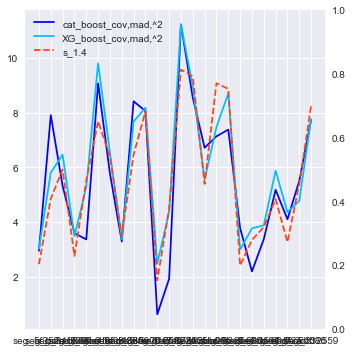

In [94]:
bench = df['s_1.4']
trial1 = df['cat_boost_cov,mad,^2']
# trial2 = df['s_1.666']
trial3 = df['XG_boost_cov,mad,^2']
# trial4=df['x_boost_q.01,q2_chunk100k']
seg=df['seg_id']
fig, ax1 = plt.subplots(figsize=(5, 5))

ax2 = ax1.twinx()
ax1.plot(seg, trial1, color='blue')
# ax1.plot(seg, trial2, color=c)
ax1.plot(seg, trial3, color=b)
# ax1.plot(seg, trial4, color=a)
ax1.plot(seg, bench, linestyle="--", color=d)

# plt.title("Unemployment Rate vs Affordability Tiers",fontdict = {'fontsize' : 20})

# ax1.set_xlabel("Year",fontdict = {'fontsize' : 14})
# ax1.set_ylabel("Affordibility Percentage",fontdict = {'fontsize' : 14})
# ax2.set_ylabel("Unemployment Rate",fontdict = {'fontsize' : 14})

# ax1.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
# ax2.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))

# ax1.tick_params(direction='out', length=5, axis="x", labelsize=12)
# ax1.tick_params(axis="y", labelsize=12)
# ax2.tick_params(axis="y", labelsize=12)

plt.grid()
handles, labels = ax1.get_legend_handles_labels()
handles1, labels1 = ax2.get_legend_handles_labels()
legend = plt.legend(handles + handles1, labels + labels1, loc="upper left")
plt.tight_layout()

plt.style.use("seaborn")

plt.savefig('chart.png', dpi=300)
plt.show()